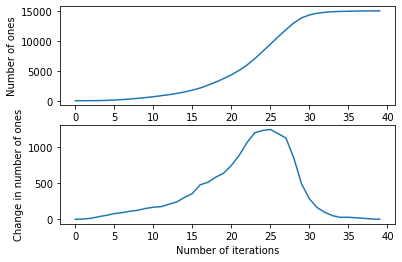

Max addition in a single iteration: 1242


In [19]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


total_num=np.array([0])
num_inc=np.array([0])
arr=np.zeros((100,150), dtype=float)
arr[50][75]=1

def swap(arr, a, b, c, d):
    temp=arr[a][b]
    arr[a][b]=arr[c][d]
    arr[c][d]=temp

def modify(arr, a, b):
    inc=0
    ngbr1x = np.array([a-1,a-1,a-1,a,a,a+1,a+1,a+1])
    ngbr1y = np.array([b-1,b,b+1,b-1,b+1,b-1,b,b+1])
    ngbr2x = np.array([a-2,a-2,a-2,a-2,a-2,a-1,a-1,a,a,a+1,a+1,a+2,a+2,a+2,a+2,a+2])
    ngbr2y = np.array([b-2,b-1,b,b+1,b+2,b-2,b+2,b-2,b+2,b-2,b+2,b-2,b-1,b,b+1,b+2])
    ngbr1x[ngbr1x==100] = -1
    ngbr1y[ngbr1y==150] = -1
    ngbr2x[ngbr2x==-2] = -1
    ngbr2x[ngbr2x==100] = -1
    ngbr2x[ngbr2x==101] = -1
    ngbr2y[ngbr2y==-2] =-1
    ngbr2y[ngbr2y==150] =-1
    ngbr2y[ngbr2y==151] =-1
    r1 = random.randint(8, size=(2))
    r2 = random.randint(16, size=(2))
    for z in r1:
        if ngbr1x[z]!=-1 and ngbr1y[z]!=-1 and arr[ngbr1x[z]][ngbr1y[z]]!=1:
            arr[ngbr1x[z]][ngbr1y[z]]=1
            inc+=1
    for z in r2:
        if ngbr2x[z]!=-1 and ngbr2y[z]!=-1 and arr[ngbr2x[z]][ngbr2y[z]]!=1:
            arr[ngbr2x[z]][ngbr2y[z]]=1
            inc+=1
    return inc

for k in range(150000):
    count=0
    addn=0
    
    for x in range(8):
        d1=random.randint(100, size=(2))
        d2=random.randint(150, size=(2))
        swap(arr, d1[0], d2[0], d1[1], d2[1])

    result = np.where(arr==1)
    count = len(result[0])
    
    for x in range(count):
        addn += modify(arr, result[0][x], result[1][x])
            
    
    total_num = np.append (total_num, count)
    num_inc = np.append (num_inc, addn)
    
    if count==15000 or count+addn ==15000:
        break

plt.subplot(2, 1, 1)
plt.xlabel("Number of iterations")
plt.ylabel("Number of ones")
plt.plot(total_num)
plt.subplot(2, 1, 2)
plt.xlabel("Number of iterations")
plt.ylabel("Change in number of ones")
plt.plot(num_inc)
plt.show()

print("Max addition in a single iteration: %s" %max(num_inc))
